In [1]:
!pip install langchain --quiet 
!pip install boto3 --quiet 
!pip install botocore --quiet 
!pip install Pillow --quiet 
%pip install anthropic IPython 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.0 which is incompatible.
sphinx 7.2.6 requires docutils<0.21,>=0.18.1, but you have docutils 0.16 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.6/851.6 kB 20.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 57.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.6/388.6 kB 6.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 12.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import boto3
import json
import time
import base64
from PIL import Image
import io
from IPython.display import Image
from IPython.display import display
import ipywidgets as widgets
from skimage import io

In [3]:
#initialize bedrock client for given region and endpoint. Change as per your region

bedrock_client = boto3.client(
    service_name='bedrock-runtime', 
    region_name='us-east-1'
)

In [4]:
# Function to convert image to base64
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
    return base64_string

In [14]:
##### Interact with a large language model (LLM) to generate text 
# based on a prompt.
#
# Arguments:
#   prompt: The text prompt to provide to the LLM.
#   llm_type: The name of the LLM to use'. 
#
# Returns:
#   The text generated by the LLM in response to the prompt.
#   
# This function:
# 1. Prints the llm_type for debugging.
# 2. Formats the prompt into the JSON payload expected by each LLM API.
# 3. Specifies the parameters for text generation like max tokens, temp.
# 4. Calls the Bedrock client to invoke the LLM model API. 
# 5. Parses the response to extract the generated text.
# 6. Returns the generated text string.

def interactWithLLM(prompt,image,modelId):
	
    # if llm_type == 'anthropic.claude-3-sonnet':
        print("**THE LLM TYPE IS -->" + model_id)
        body = json.dumps({
                          "anthropic_version": "bedrock-2023-05-31",
                          "max_tokens": 1000,
                          "messages": [
                            {
                              "role": "user",
                              "content": [
                                {
                                  "type": "image",
                                  "source": {
                                    "type": "base64",
                                    "media_type": "image/jpeg",
                                    "data": image
                                  }
                                },
                                {
                                  "type": "text",
                                  "text": prompt
                                }
                              ]
                            }
                          ]
                        }) 
        # modelId = 'anthropic.claude-3-sonnet-20240229-v1:0' # change this to use a different version from the model provider
        accept = 'application/json'
        contentType = 'application/json'
        start_time = time.time()
        response = bedrock_client.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
         # Record the end time
        end_time = time.time()

        # Calculate the runtime
        runtime = end_time - start_time
        print(f"The runtime of the invoke_model was {runtime:.2f} seconds.")
        
        response_body = json.loads(response.get('body').read())
        response_text = response_body.get('content')[0]['text']

        return response_text

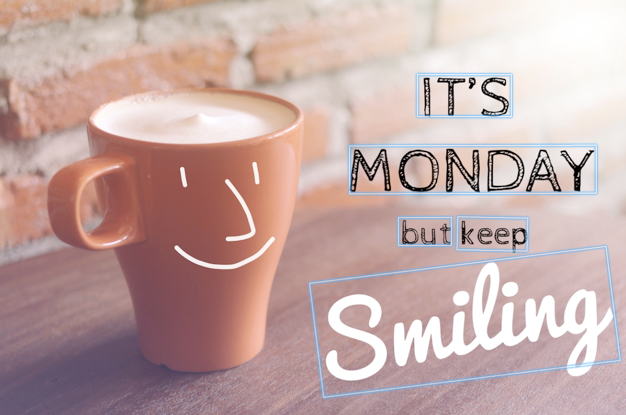

In [15]:
# Example usage
image_path = './samp1.png'  # Specify the path to your image
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [16]:
model_id = 'anthropic.claude-3-haiku-20240307-v1:0'

# model_id = 'anthropic.claude-3-sonnet-20240229-v1:0'

In [17]:
response_text = interactWithLLM("What is in this image?",base64_string,model_id)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-haiku-20240307-v1:0
The runtime of the invoke_model was 2.27 seconds.
response_text --- 
This image shows a coffee mug with a smiley face design on it, and a sign that says "It's Monday but keep Smiling". The mug is placed in front of a brick wall background, creating a cozy and casual atmosphere. The overall message of the image is about maintaining a positive attitude and staying upbeat, even on a Monday morning.


In [18]:
#model_id = 'anthropic.claude-3-haiku-20240307-v1:0'

model_id = 'anthropic.claude-3-sonnet-20240229-v1:0'

In [19]:
response_text = interactWithLLM("What is in this image?",base64_string,model_id)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet-20240229-v1:0
The runtime of the invoke_model was 6.75 seconds.
response_text --- 
This image depicts a motivational scene related to starting the week with a positive attitude. The main elements are:

1. A ceramic mug or cup filled with a hot beverage, likely coffee or tea. The mug has a smiley face design on it, suggesting cheerfulness.

2. Some decorative text pieces or signs that spell out "It's Monday but keep Smiling". This message encourages maintaining a happy and optimistic outlook despite it being Monday, which is often seen as the most difficult day of the workweek.

3. The background shows a brick wall texture, giving a rustic or cozy setting.

The overall composition aims to create an uplifting and inspirational mood as one begins a new week, reminding the viewer to stay positive and approach Mondays with a smile.


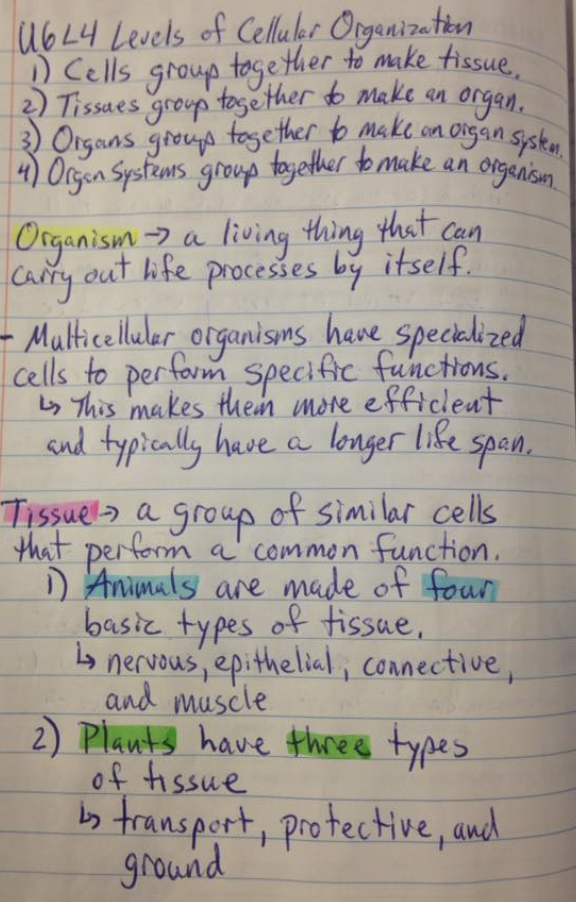

In [20]:
# Example usage
image_path = './school_notes.png'  # Specify the path to your image
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [21]:
model_id = 'anthropic.claude-3-sonnet-20240229-v1:0'

In [24]:

response_text = interactWithLLM("Transcribe this text. Only output the text and nothing else.",base64_string,model_id)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet-20240229-v1:0
The runtime of the invoke_model was 6.97 seconds.
response_text --- 
ILC 24 Levels of Cellular Organization
1) Cells group together to make tissue.
2) Tissues group together to make an organ.
3) Organs group together to make an organ system.
4) Organ systems group together to make an organism.

Organism → a living thing that can carry out life processes by itself.

Multicellular organisms have specialized cells to perform specific functions. This makes them more efficient and typically have a longer life span.

Tissue→ a group of similar cells that perform a common function.
1) Animals are made of four basic types of tissue.
Nervous, epithelial, connective, and muscle
2) Plants have three types of tissue.
Transport, protective, and ground


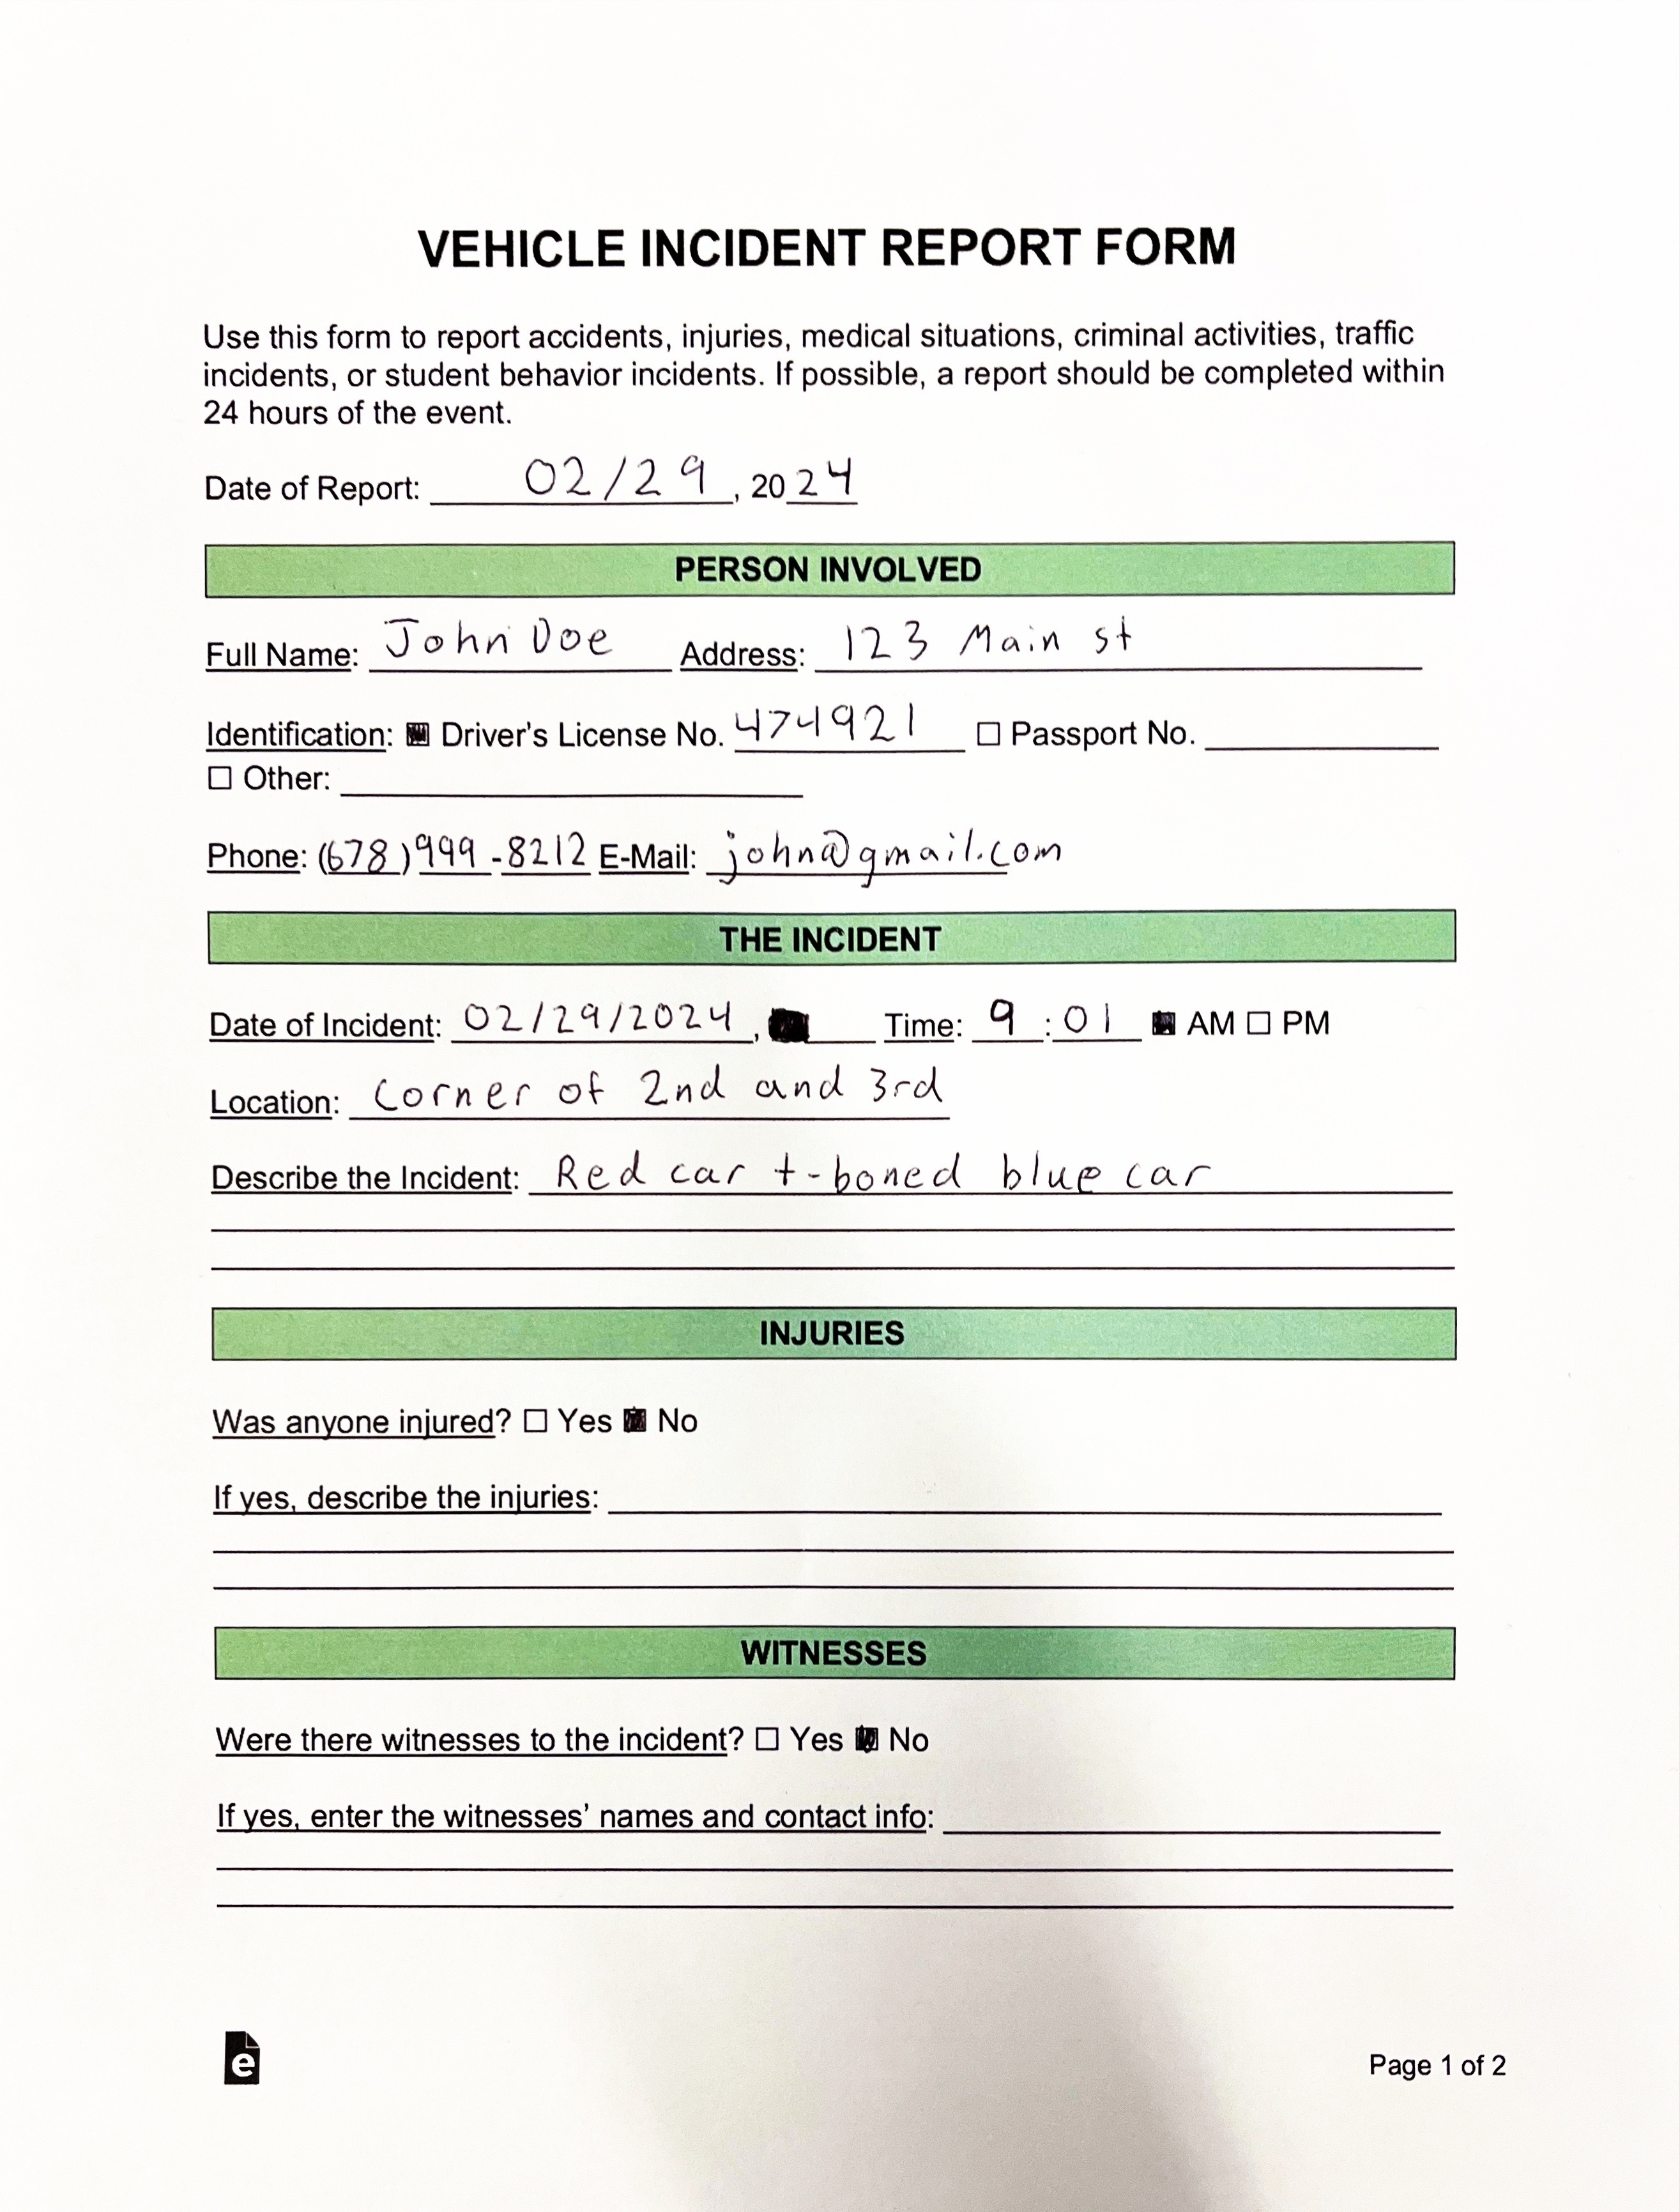

In [26]:
image_path = './vehicle_form.jpeg'
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [28]:
response_text = interactWithLLM("Transcribe this form exactly.",base64_string,model_id)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet-20240229-v1:0
The runtime of the invoke_model was 13.52 seconds.
response_text --- 
VEHICLE INCIDENT REPORT FORM

Use this form to report accidents, injuries, medical situations, criminal activities, traffic incidents, or student behavior incidents. If possible, a report should be completed within 24 hours of the event.

Date of Report: 02/29, 2024

PERSON INVOLVED

Full Name: John Doe    Address: 123 Main St

Identification: ☑ Driver's License No. 47492l    ☐ Passport No. ____________
☐ Other: _________________________

Phone: (678) 999-8212 E-Mail: johnd@gmail.com  

THE INCIDENT  

Date of Incident: 02/29/2024    Time: 9:01 ☑ AM ☐ PM

Location: Corner of 2nd and 3rd

Describe the Incident: Red car t-boned blue car

INJURIES  

Was anyone injured? ☐ Yes ☑ No  

If yes, describe the injuries: _________________________________________________
____________________________________________________________________________
_____________________

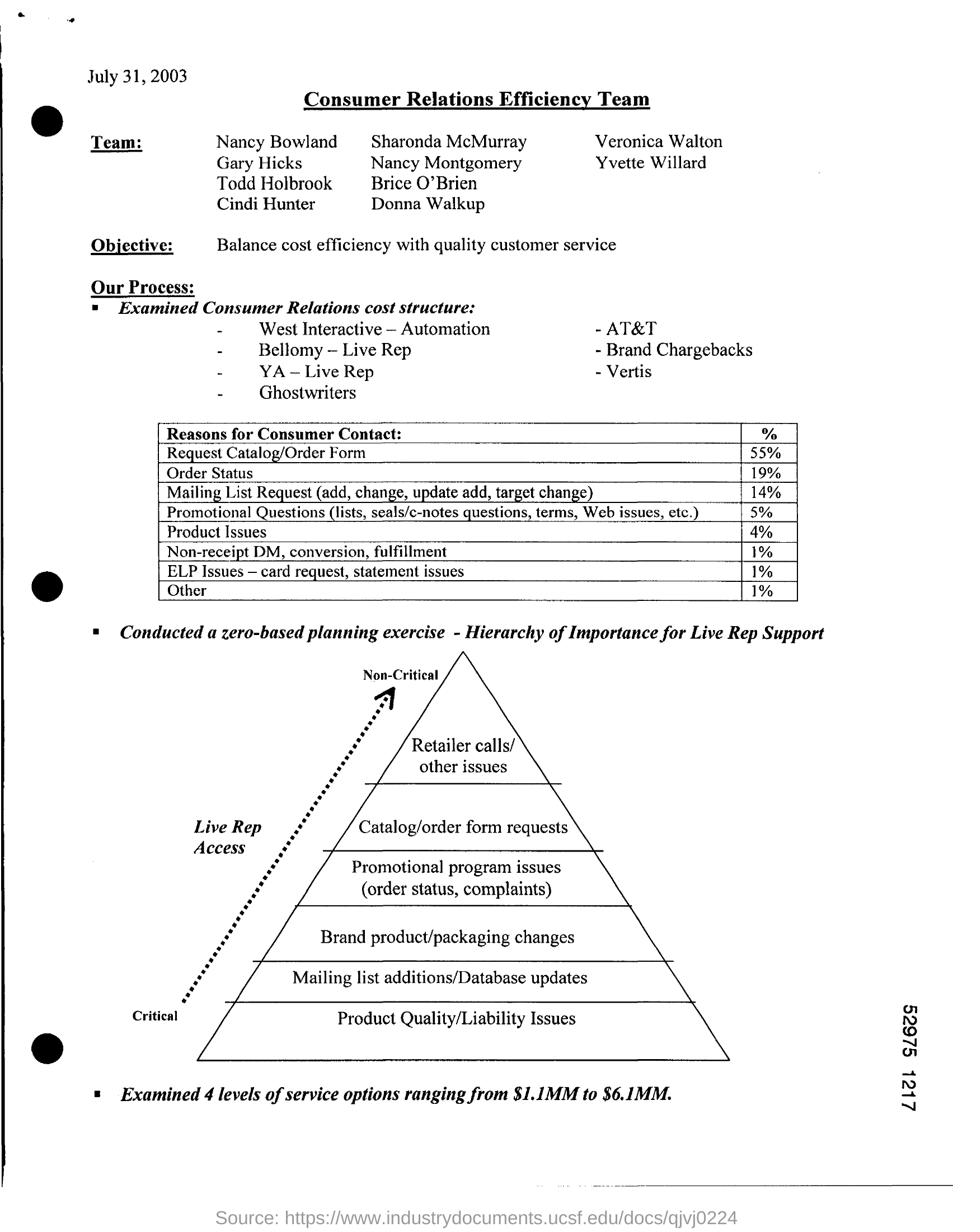

In [29]:
image_path = './complex_page.jpeg'
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [31]:
response_text = interactWithLLM("Which is the most critical issue for live rep support?",base64_string,model_id)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet-20240229-v1:0
The runtime of the invoke_model was 3.63 seconds.
response_text --- 
According to the "Hierarchy of Importance for Live Rep Support" pyramid shown in the image, the most critical issue for live representative support is "Product Quality/Liability Issues".


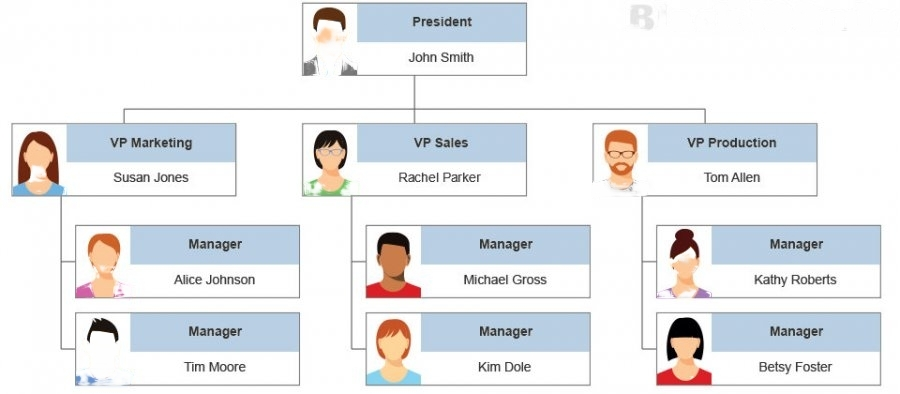

In [32]:
image_path = './org_chart.jpeg'
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [34]:
response_text = interactWithLLM("Turn this org chart into JSON indicating who reports to who. Only output the JSON and nothing else..",base64_string,model_id)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet-20240229-v1:0
The runtime of the invoke_model was 6.06 seconds.
response_text --- 
{
  "name": "John Smith",
  "title": "President",
  "reports": [
    {
      "name": "Susan Jones",
      "title": "VP Marketing",
      "reports": [
        {
          "name": "Alice Johnson",
          "title": "Manager",
          "reports": []
        },
        {
          "name": "Tim Moore",
          "title": "Manager",
          "reports": []
        }
      ]
    },
    {
      "name": "Rachel Parker",
      "title": "VP Sales",
      "reports": [
        {
          "name": "Michael Gross",
          "title": "Manager",
          "reports": []
        },
        {
          "name": "Kim Dole",
          "title": "Manager",
          "reports": []
        }
      ]
    },
    {
      "name": "Tom Allen",
      "title": "VP Production",
      "reports": [
        {
          "name": "Kathy Roberts",
          "title": "Manager",
          "reports"